In [1]:
#Load in the essential Libraries
import pandas as pd
import numpy as np

In [2]:
#Read in the dataset with pandas and check the top 5 rows
dataset= pd.read_csv('C:/Users/LC/Desktop/50_startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Create a statistical summary
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:

#create a correlation table
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
#Load in the visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

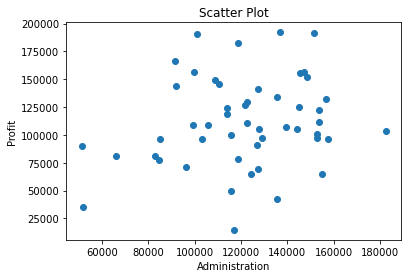

In [7]:

x=dataset['Administration']
y=dataset['Profit']
plt.scatter(x,y)
plt.title("Scatter Plot")
plt.xlabel('Administration')
plt.ylabel('Profit');

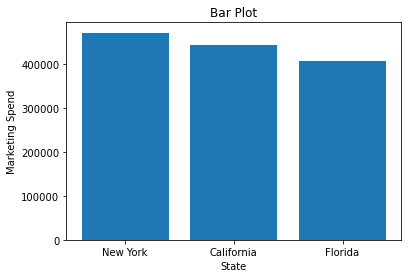

In [8]:

plt.bar(dataset['State'],dataset['Marketing Spend'])
plt.title("Bar Plot")
plt.xlabel('State')
plt.ylabel('Marketing Spend');

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Profit'>

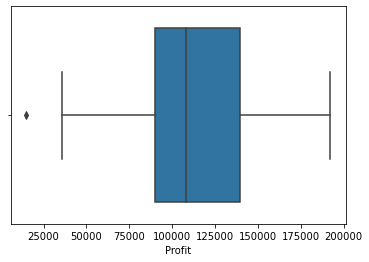

In [10]:
sns.boxplot(x='Profit',data=dataset)

<AxesSubplot:xlabel='State', ylabel='Profit'>

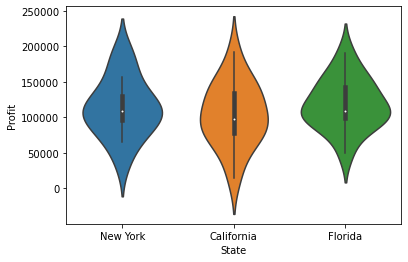

In [11]:
sns.violinplot(x='State',y='Profit',data=dataset)

<AxesSubplot:xlabel='State', ylabel='Profit'>

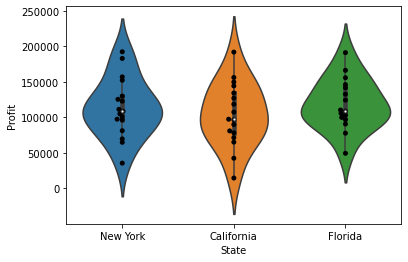

In [12]:
sns.swarmplot(x='State',y='Profit',data=dataset,color='black')
sns.violinplot(x='State',y='Profit',data=dataset)

C:\Users\LC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

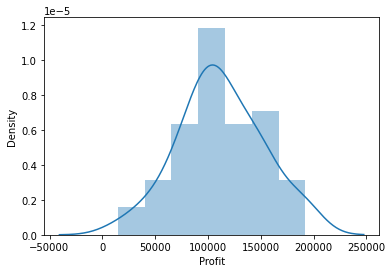

In [13]:
sns.distplot(dataset['Profit'])

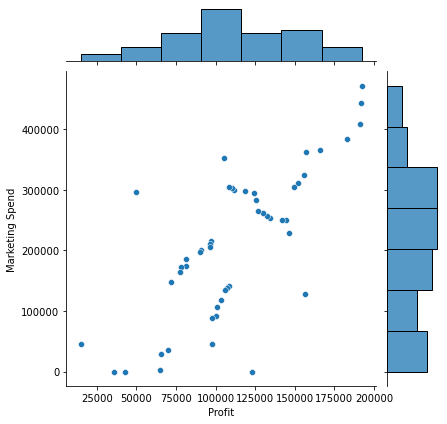

In [14]:
sns.jointplot(x='Profit',y='Marketing Spend',data=dataset)

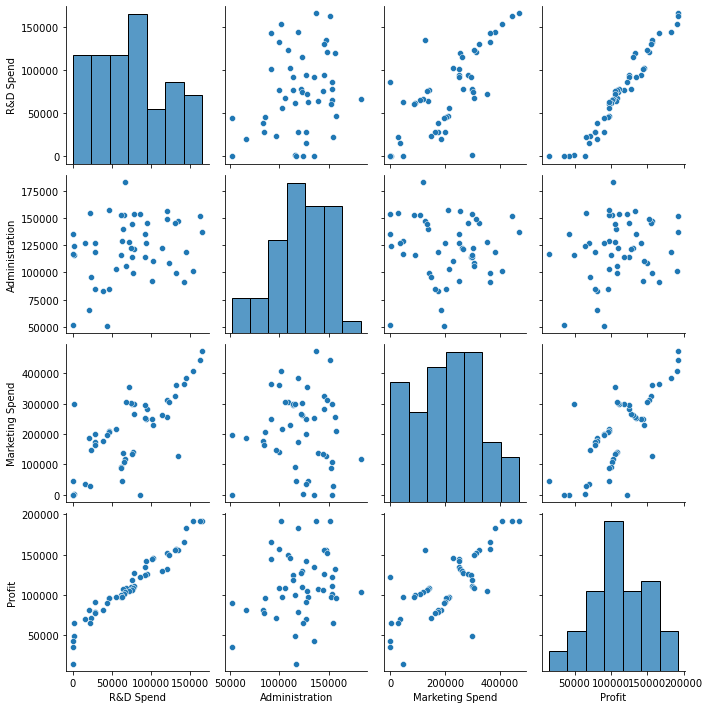

In [15]:
sns.pairplot(data=dataset)

In [16]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
#encode the string or state columns
dataset = pd.get_dummies(dataset,drop_first=True)

In [19]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [20]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [26]:
# 
from sklearn.model_selection  import train_test_split
features = ['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']
target = ['Profit']

X= dataset[features]
y=dataset[target]

In [27]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

In [28]:

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled =  scale.fit_transform(X_train)
X_test_scaled =scale.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:

lin  = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

9729.322717179517

In [33]:
y_pred = lin.predict(X_test)

In [35]:
print(f"The R2 score is {r2_score(y_test,y_pred):.3f} and root mean squar error is {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

The R2 score is 0.927 and root mean squar error is 9729.32


In [36]:
y_pred2 = pd.DataFrame(y_pred)

In [37]:

y_pred2

,0
0,115847.087145
1,58478.341592
2,183693.015528
3,73058.338803
4,107881.459056
5,147580.242287
6,97612.484880
7,96205.511742
8,109631.090537
9,176447.557982


In [38]:
y_test2 = y_test.reset_index()

In [39]:
compared = pd.merge(y_test2,y_pred2,left_index=True,right_index=True)
compared.columns=['index','Profit','Prediction']
compared

,index,Profit,Prediction
0,27,105008.31,115847.087145
1,43,69758.98,58478.341592
2,2,191050.39,183693.015528
3,36,90708.19,73058.338803
4,26,105733.54,107881.459056
5,15,129917.04,147580.242287
6,28,103282.38,97612.484880
7,31,97483.56,96205.511742
8,23,108733.99,109631.090537
9,3,182901.99,176447.557982


In [40]:
compared['difference'] =  compared['Profit'] - compared['Prediction']
compared

,index,Profit,Prediction,difference
0,27,105008.31,115847.087145,-10838.777145
1,43,69758.98,58478.341592,11280.638408
2,2,191050.39,183693.015528,7357.374472
3,36,90708.19,73058.338803,17649.851197
4,26,105733.54,107881.459056,-2147.919056
5,15,129917.04,147580.242287,-17663.202287
6,28,103282.38,97612.484880,5669.895120
7,31,97483.56,96205.511742,1278.048258
8,23,108733.99,109631.090537,-897.100537
9,3,182901.99,176447.557982,6454.432018


In [41]:
mean_error =compared.difference.mean()

In [42]:
squared  =mean_error**2

In [43]:

np.sqrt(squared)

792.7150265142453

In [44]:
ypred3 = lin.predict(X)

In [45]:
dataset['Predictions'] =ypred3

In [46]:
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York,Predictions
0,165349.20,136897.80,471784.10,192261.83,0,1,195686.606988
1,162597.70,151377.59,443898.53,191792.06,0,0,191400.481336
2,153441.51,101145.55,407934.54,191050.39,1,0,183693.015528
3,144372.41,118671.85,383199.62,182901.99,0,1,176447.557982
4,142107.34,91391.77,366168.42,166187.94,1,0,173506.689987
5,131876.90,99814.71,362861.36,156991.12,0,1,166568.697842
6,134615.46,147198.87,127716.82,156122.51,0,0,157669.066699
7,130298.13,145530.06,323876.68,155752.60,1,0,159377.655422
8,120542.52,148718.95,311613.29,152211.77,0,1,152802.778162
9,123334.88,108679.17,304981.62,149759.96,0,0,156809.515140


In [47]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York,Predictions
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068,0.995820
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145,0.182946
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670,0.777009
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368,0.974469
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366,0.097923
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000,0.045647
Predictions,0.995820,0.182946,0.777009,0.974469,0.097923,0.045647,1.000000


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [49]:
lin.fit(X_train,y_train)
y_pred5 = lin.predict(X_test)

In [50]:
r2_score(y_test,y_pred5)

0.9454456031478394

In [51]:

y_pred5

array([[116390.47514615],
       [187335.50025476],
       [ 61257.53790992],
       [172510.18654505],
       [162733.05607539],
       [ 85492.86593402],
       [101199.3733466 ],
       [136157.94787091],
       [ 50237.63625199],
       [190275.80779111],
       [129838.55520499],
       [ 89273.98973017],
       [127402.05394797]])

In [52]:

y_test

,Profit
21,111313.02
1,191792.06
43,69758.98
4,166187.94
5,156991.12
39,81005.76
30,99937.59
11,144259.40
49,14681.40
0,192261.83
